In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from scipy.special import expit
from scipy import interpolate
from scipy import integrate
from collections import Counter
from matplotlib.colors import ListedColormap

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('default')

import src.visualization as viz
import src.simulation as sim

/Users/nswinger/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


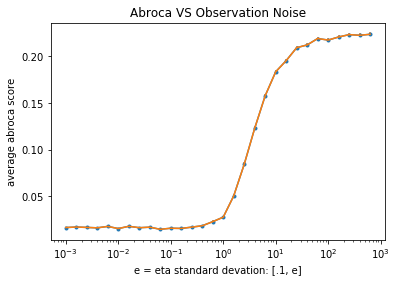

In [2]:
# observation noise vs. ABROCA plot example
eta_sds = [10**i for i in np.arange(-3,3,0.2)]
n = 10000
r = 100
s = 13
avg_abrocas, errors = viz.ABROCAvs_plot('obs_noise', eta_sds, s=s, n=n, r=r)
plt.xscale('log')
plt.yscale('linear')
plt.plot(eta_sds, avg_abrocas, marker='.')
plt.errorbar(eta_sds, avg_abrocas, yerr=errors)
plt.xlabel('e = eta standard devation: [.1, e]')
plt.ylabel('average abroca score')
plt.title('Abroca VS Observation Noise')
plt.savefig(f'figures/abroca-vs-obsnoise(n={n},r={r},s={s}).png')
plt.show()

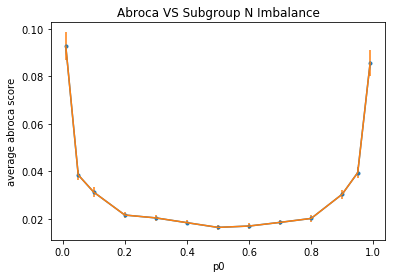

In [4]:
# sample imbalance vs. ABROCA plot example
p0 = [.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]
n = 10000
r = 100
s = 13
avg_abrocas, errors = viz.ABROCAvs_plot('p_0', p0, s=s, n=n, r=r)
plt.xscale('linear')
plt.yscale('linear')
plt.plot(p0, avg_abrocas, marker='.')
plt.errorbar(p0, avg_abrocas, yerr=errors)
plt.xlabel('p0')
plt.ylabel('average abroca score')
plt.title('Abroca VS Subgroup N Imbalance')
plt.savefig(f'figures/abroca-vs-p0(n={n},r={r},s={s}).png')
plt.show()

/Users/nswinger/GitHub/ABROCAproject/src/visualization.py:88: RuntimeWarning:

Mean of empty slice

/Users/nswinger/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: UserWarning:




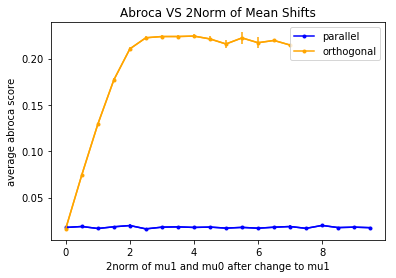

In [5]:
#mean shifts vs. ABROCA plot example
mu_change = np.arange(0,10,0.5)
n = 10000
r = 100
s = 13
avg_abrocas_p, errors_p = viz.ABROCAvs_plot('mu_parallel', mu_change, s=s, n=n, r=r)
avg_abrocas_o, errors_o = viz.ABROCAvs_plot('mu_orthogonal', mu_change, s=s, n=n, r=r)

mu_diff_p = [np.linalg.norm(np.array([0+e,0-e]) - np.array([0,0]), ord=2) for e in mu_change]
mu_diff_o = [np.linalg.norm(np.array([0+e,0+e]) - np.array([0,0]), ord=2) for e in mu_change]

plt.xscale('linear')
plt.yscale('linear')
plt.plot(mu_change, avg_abrocas_p, marker='.', label='parallel', color='blue')
plt.errorbar(mu_change, avg_abrocas_p, yerr=errors_p, color='blue')
plt.plot(mu_change, avg_abrocas_o, marker='.', label='orthogonal', color='orange')
plt.errorbar(mu_change, avg_abrocas_o, yerr=errors_o, color='orange')
plt.xlabel('2norm of mu1 and mu0 after change to mu1')
plt.ylabel('average abroca score')
plt.title('Abroca VS 2Norm of Mean Shifts')
plt.legend()
plt.savefig(f'figures/abroca-vs-meanshifts(n={n},r={r},s={s}).png')
plt.show()

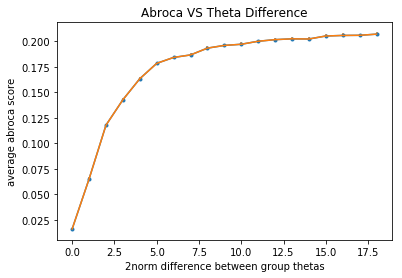

In [6]:
# theta difference vs. ABROCA plot example
theta_scale = np.arange(1,20,1)
n = 10000
r = 100
s = 13
avg_abrocas, errors = viz.ABROCAvs_plot('theta_diff', theta_scale, s=s, n=n, r=r)

theta_diff = [np.linalg.norm(np.array([[1,1*e]]) - np.array([[1,1]]), ord=2) for e in theta_scale]

plt.xscale('linear')
plt.yscale('linear')
plt.plot(theta_diff, avg_abrocas, marker='.')
plt.errorbar(theta_diff, avg_abrocas, yerr=errors)
plt.xlabel('2norm difference between group thetas')
plt.ylabel('average abroca score')
plt.title('Abroca VS Theta Difference')
plt.savefig(f'figures/abroca-vs-thetadifference(n={n},r={r},s={s}).png')
plt.show()

In [2]:
fig0, fig1 = viz.visualize_data(point_size=.5, s=13, mu_change=3, orthog_to_boundary=True, d=3)
fig0.show()
fig1.show()

/Users/nswinger/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/Users/nswinger/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/nswinger/anaconda3/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]
/Users/nswinger/GitHub/ABROCAproject/src/abroca.py:30: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  slice, _ = integrate.quad(f2, lb, ub, limit)


/Users/nswinger/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


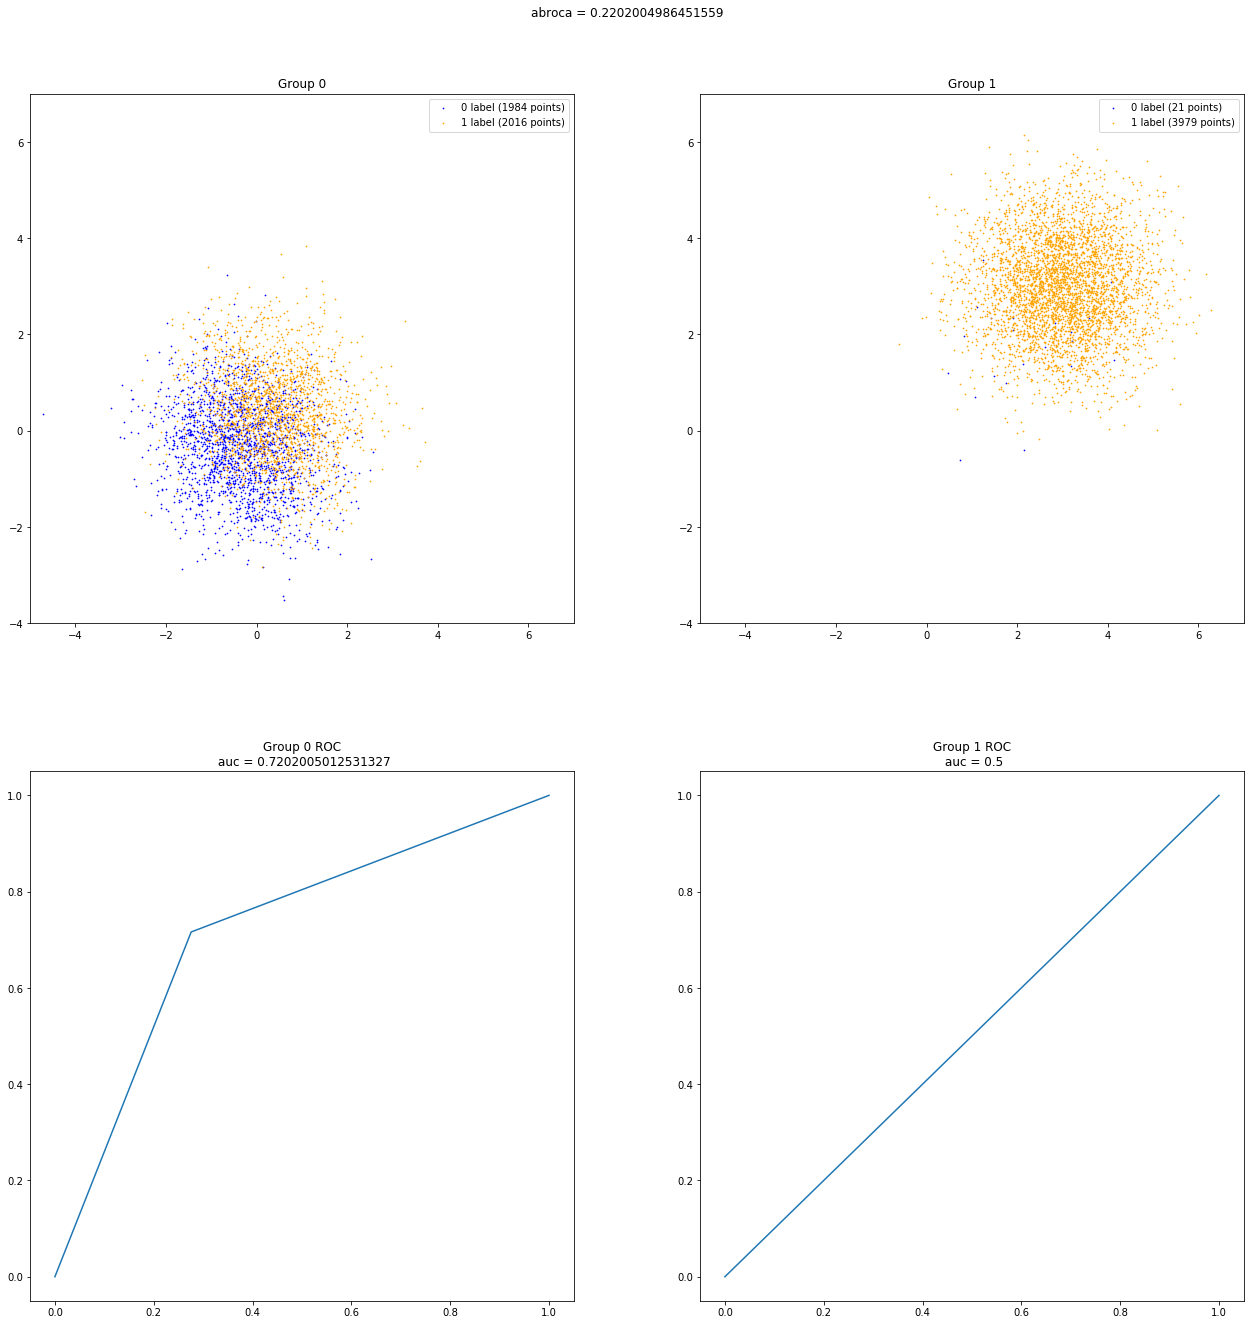

In [2]:
# visualize data
fig = viz.visualize_data(point_size=.5, s=13, mu_change=3, orthog_to_boundary=True)
fig.show()


average auc score: 0.7263772227088346


/Users/nswinger/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


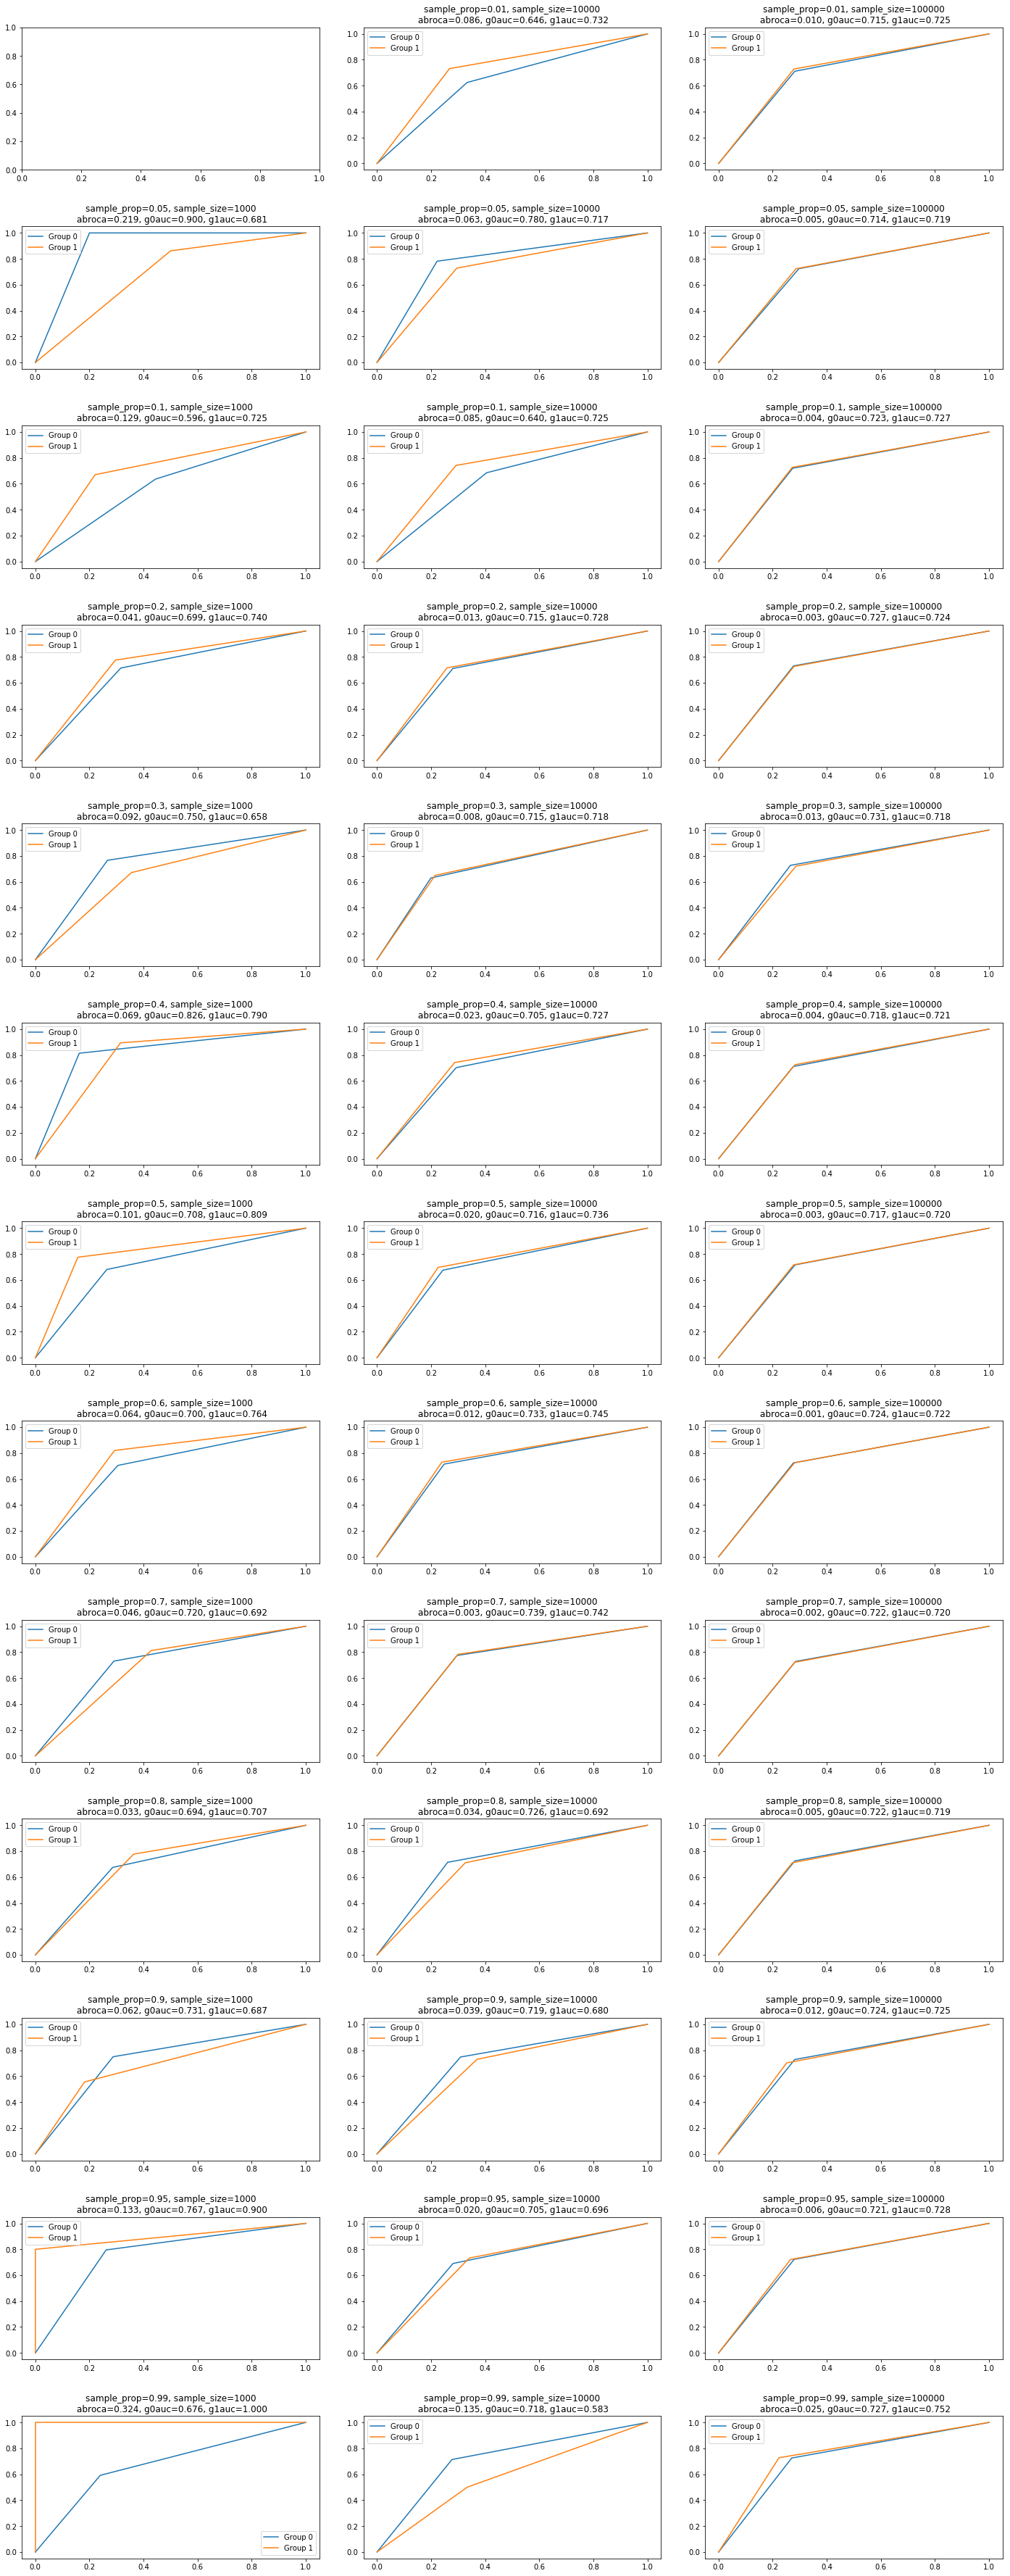

In [12]:
g0_percent = [.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]
sample_sizes = [10**i for i in range(3,6)]
fig, text = ABROCA.two_way_plot(g0_percent, sample_sizes, 'sample_prop vs sample_size', s=13, figsize=(20,50))
print(text)
fig.show()


average auc score: 0.6785798276101106


/Users/nswinger/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


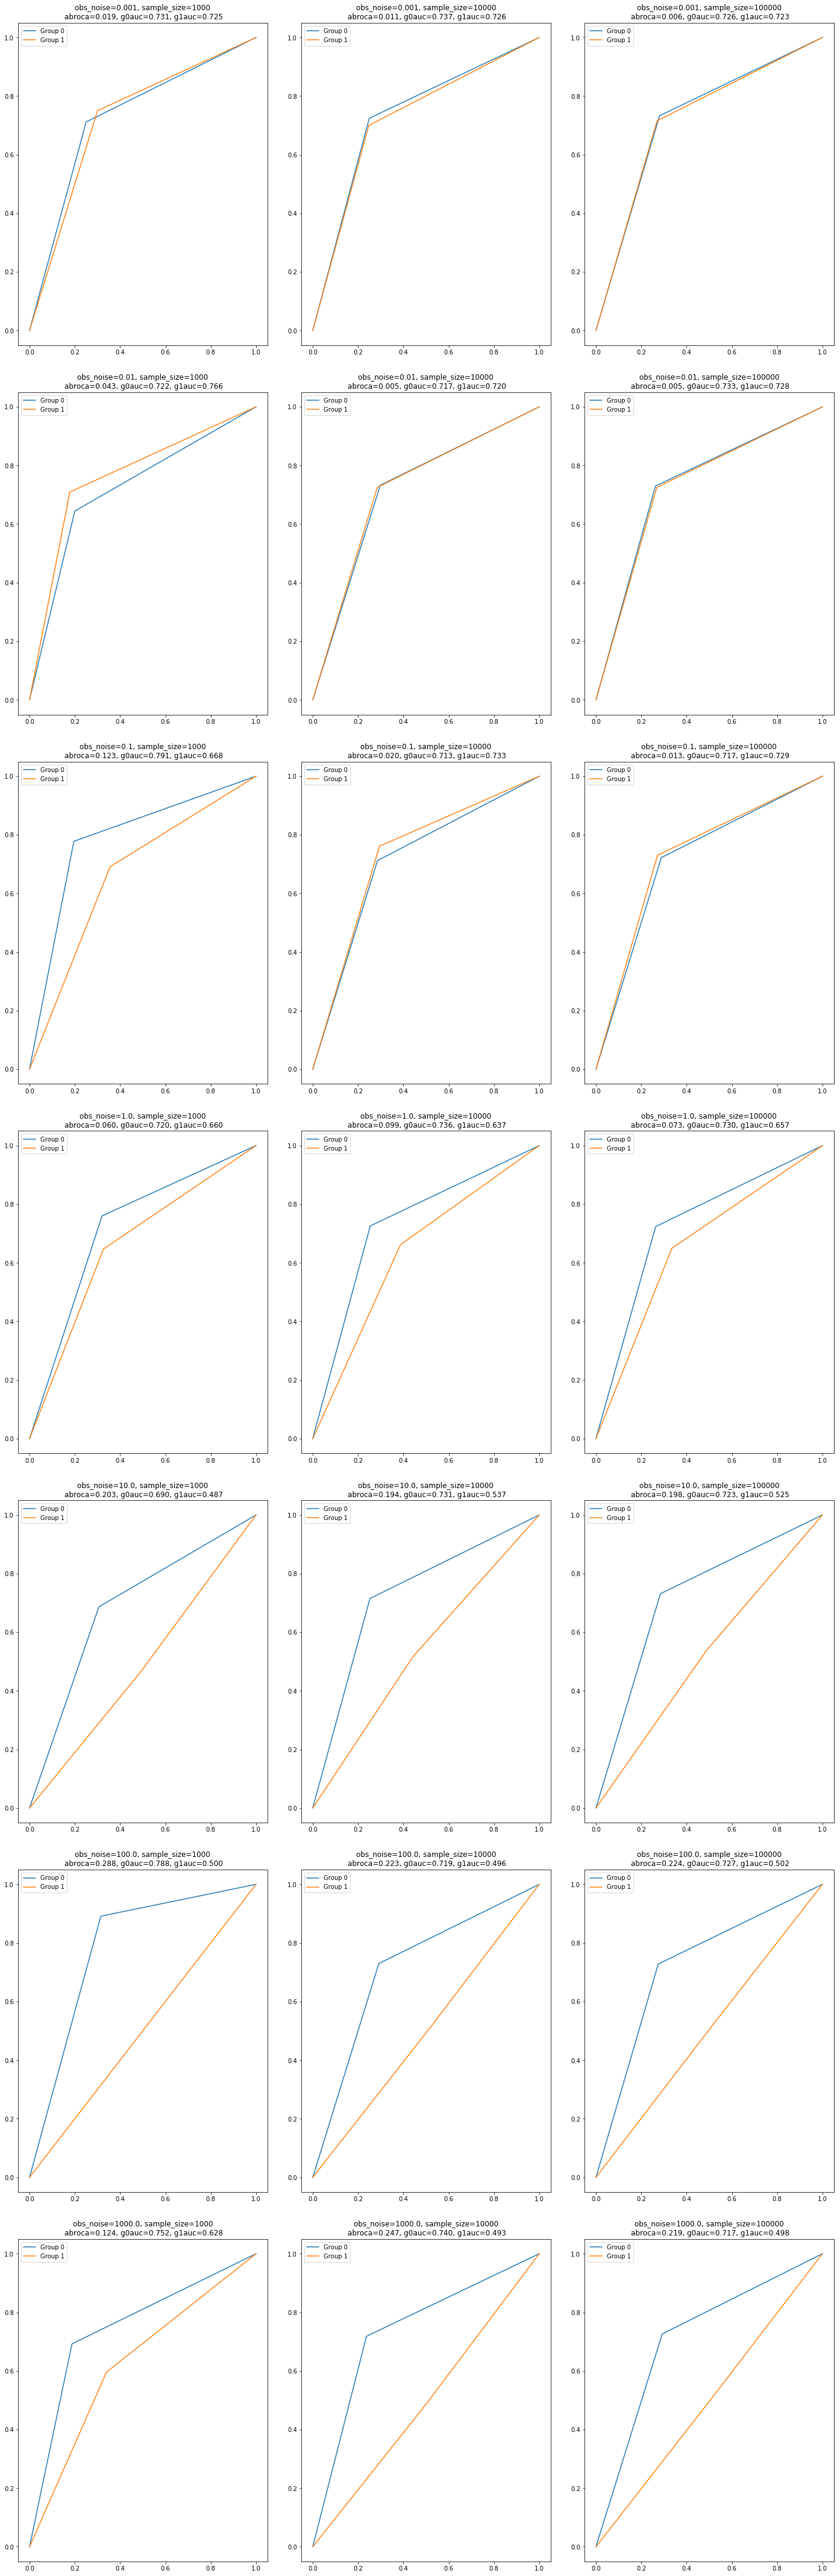

In [10]:
eta_sds = [10**i for i in np.arange(-3,4,1.0)]
sample_sizes = [10**i for i in range(3,6)]
fig, text = ABROCA.two_way_plot(eta_sds, sample_sizes, 'obs_noise vs sample_size', s=13, figsize=(20,60))
print(text)
fig.show()

average auc score: 0.7086716608038942


/Users/nswinger/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


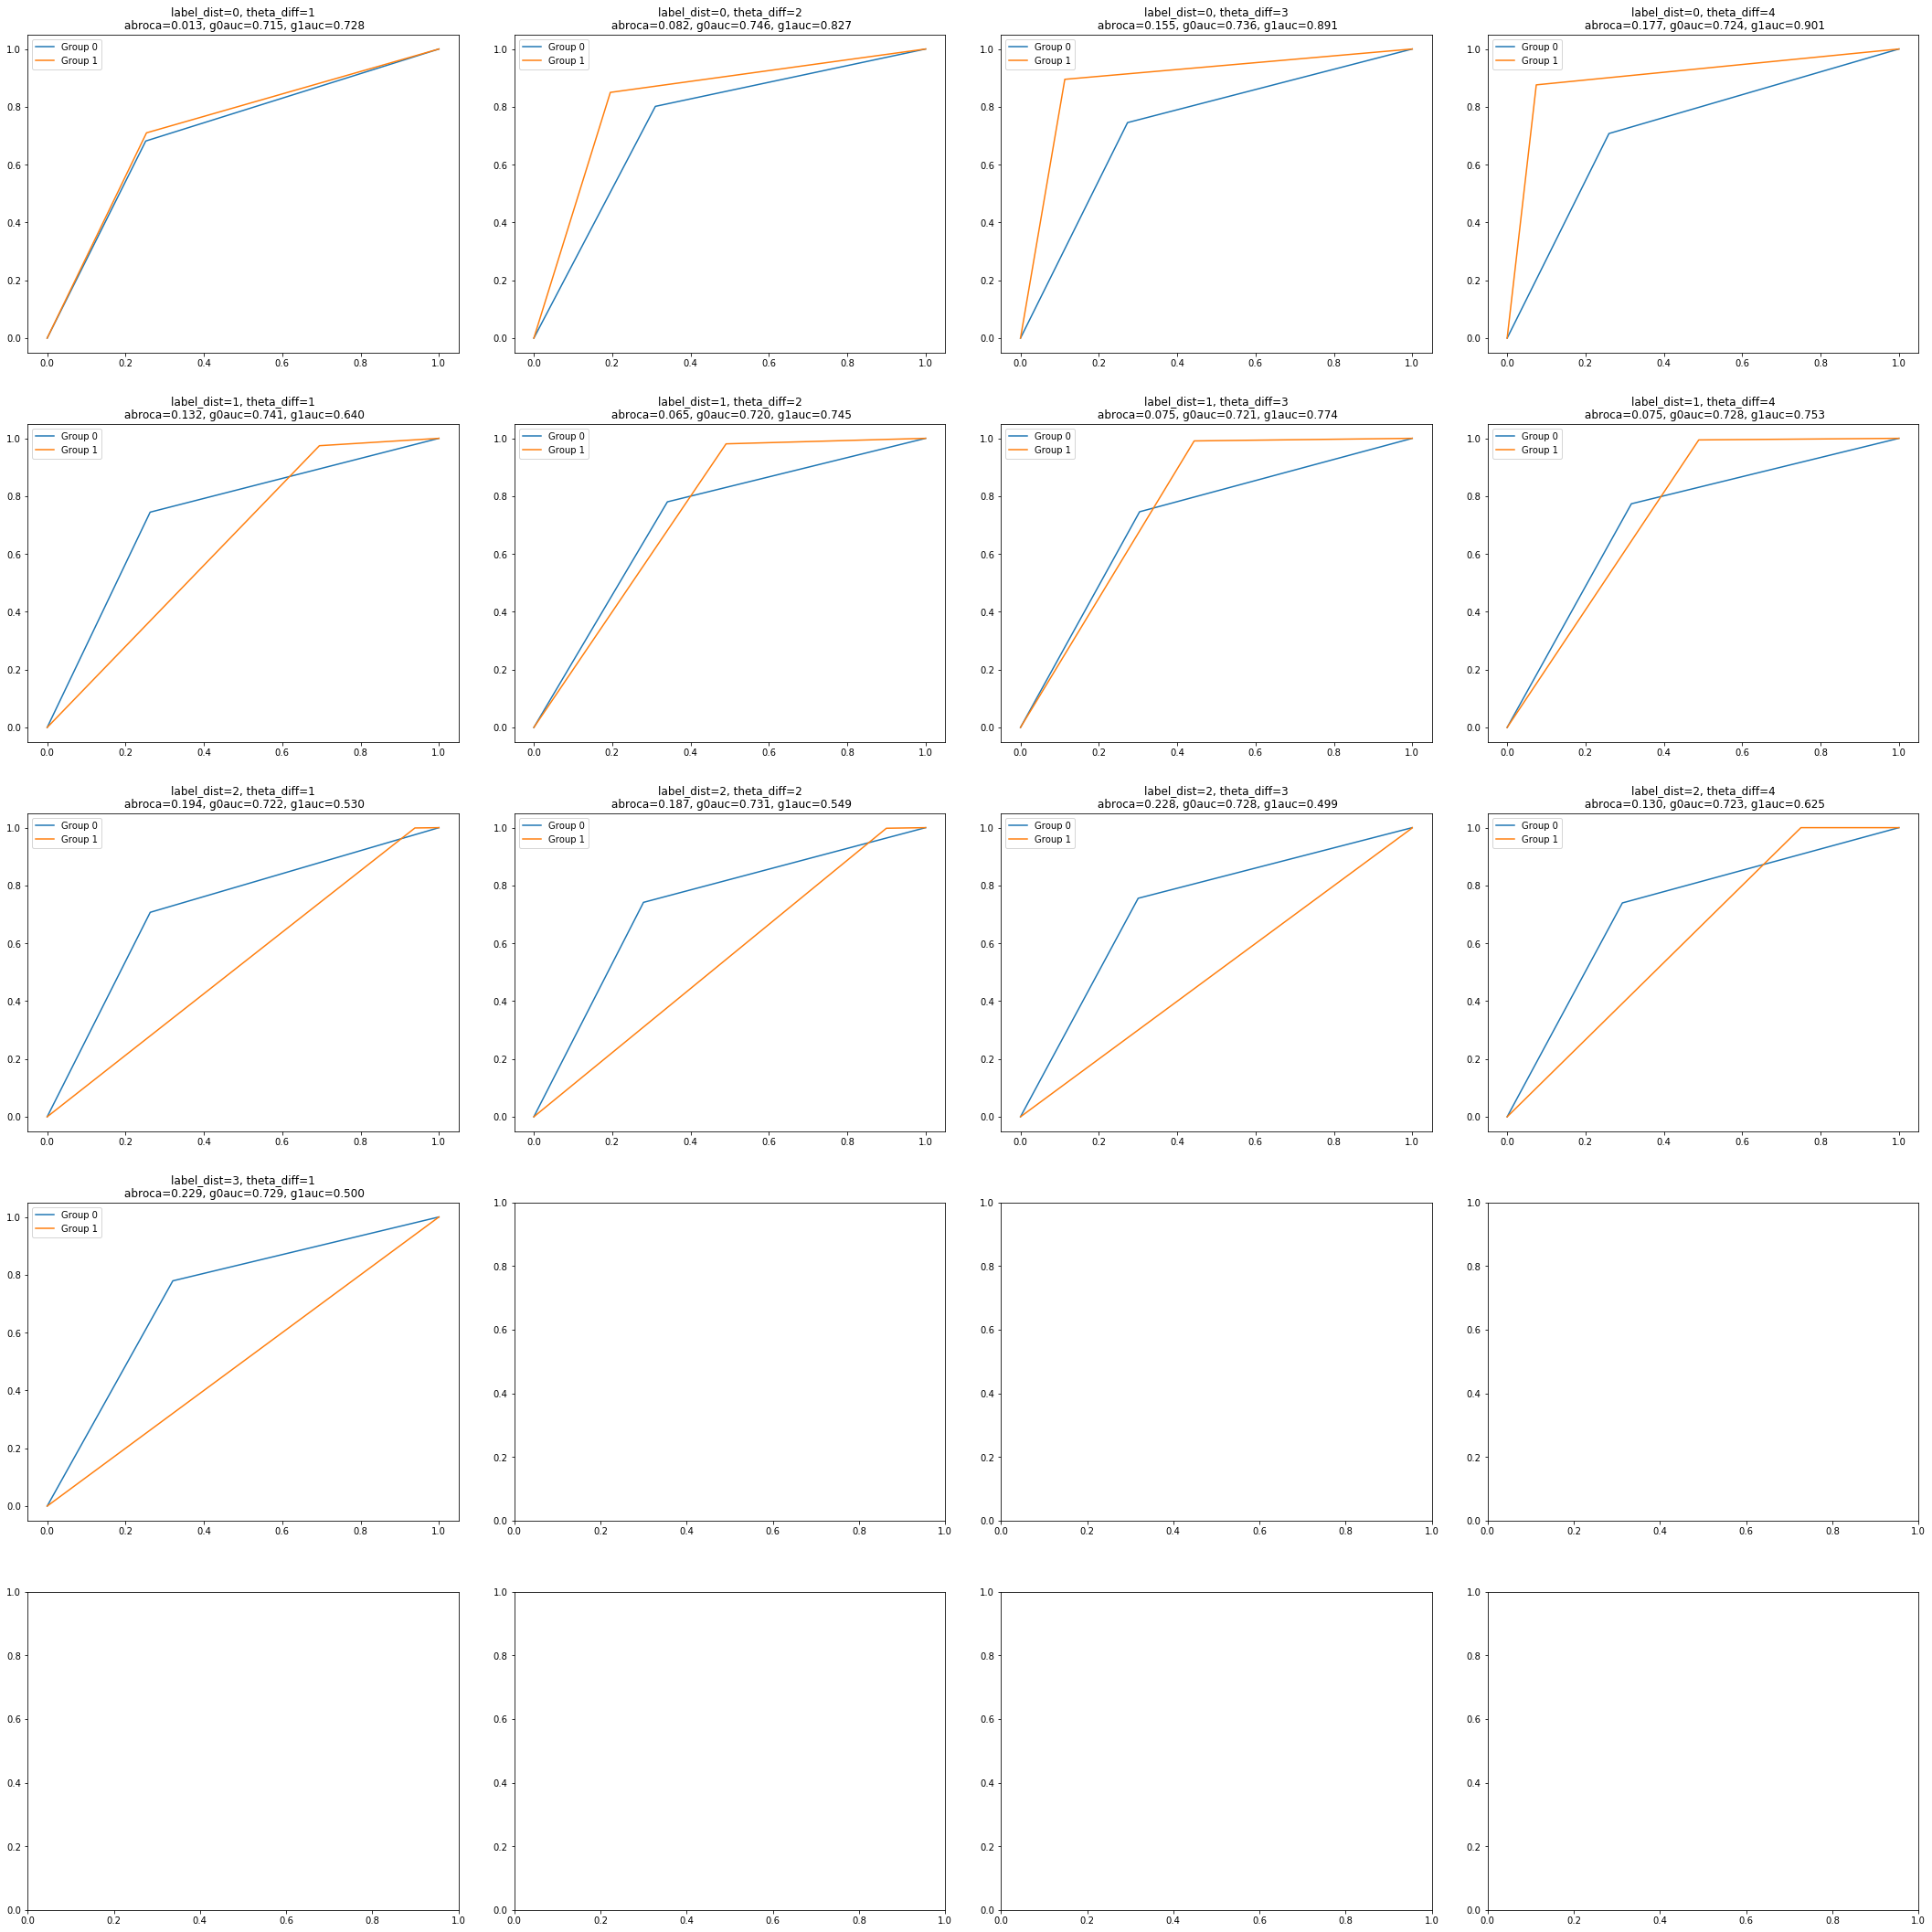

In [14]:
theta_scale = np.arange(1,5,1)
mu_change = np.arange(0,5,1)
fig, text = ABROCA.two_way_plot(mu_change, theta_scale, 'label_dist vs theta_diff', s=13, n=[5000,5000], figsize=(30,30))
print(text)
fig.show()

average auc score: 0.6395001665497247


/Users/nswinger/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


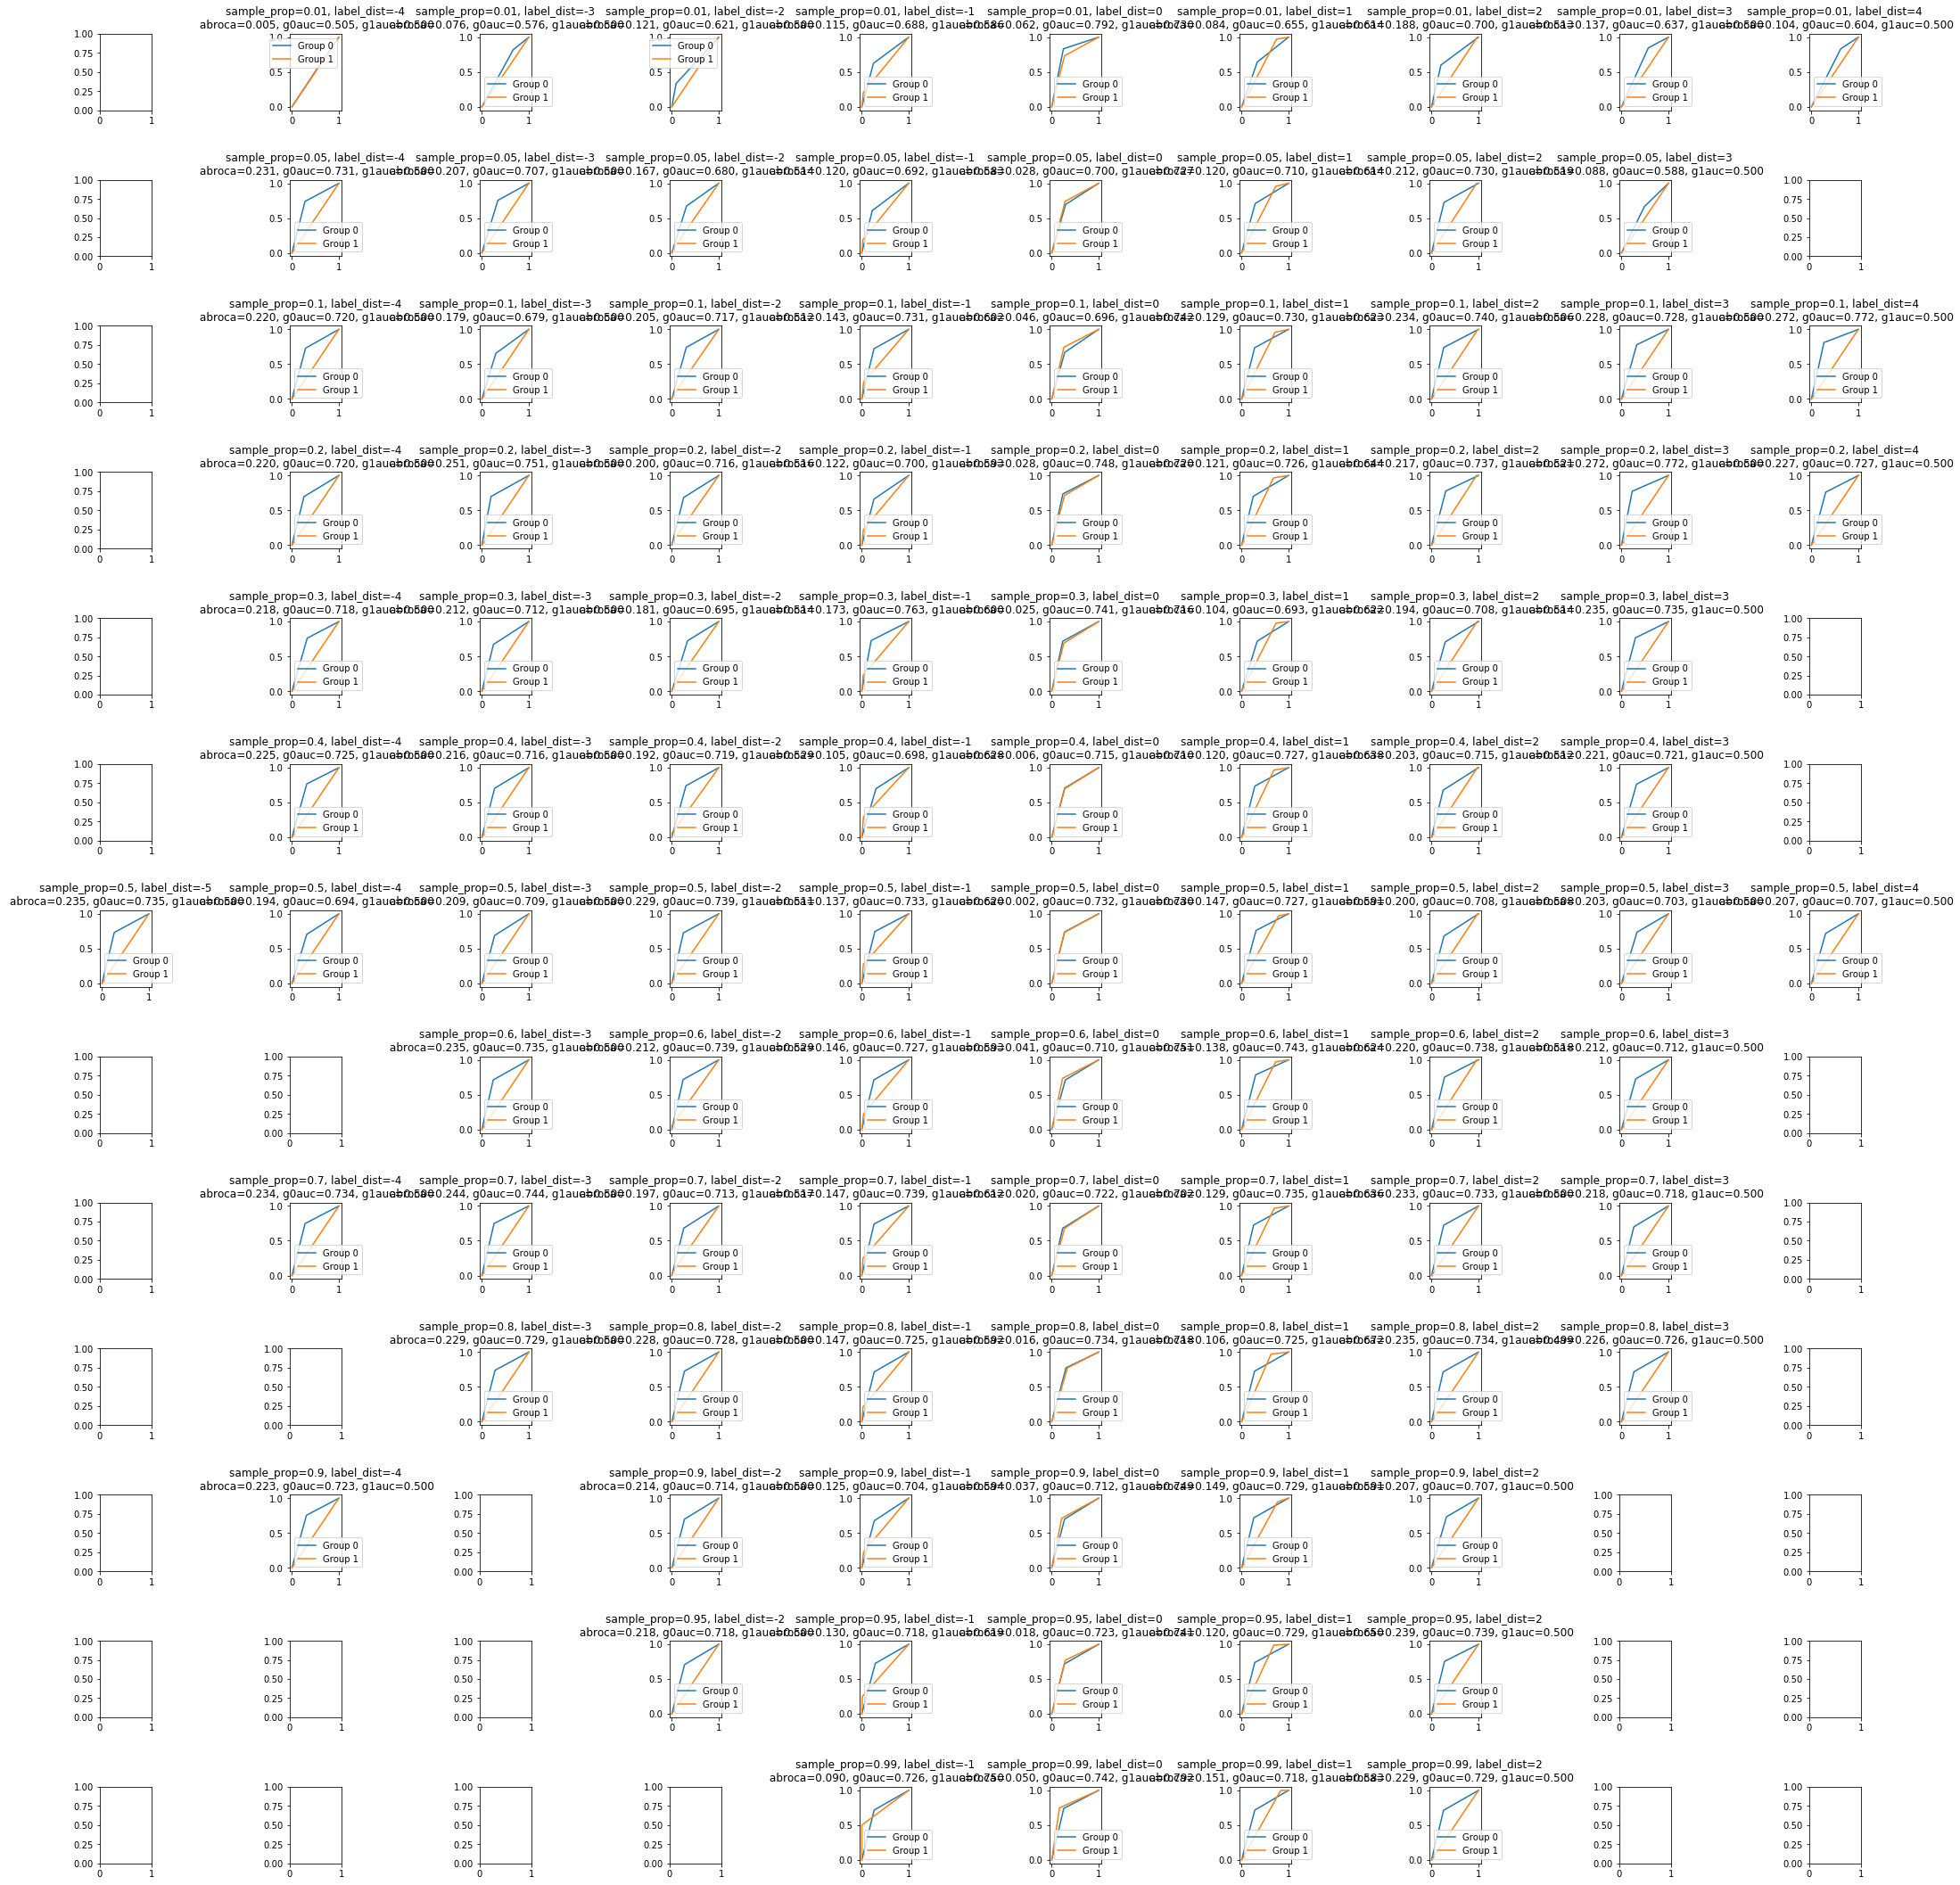

In [6]:
mu_change = np.arange(-5,5,1)
g0_percent = [.01,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99]
fig, text = ABROCA.two_way_plot(g0_percent, mu_change, 'sample_prop vs label_dist', s=13, n=[5000,5000], figsize=(30,30))
print(text)
fig.show()